<a href="https://colab.research.google.com/github/Vijith06/CDWInternShip/blob/day3/day_3%20RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [8]:
prices = pd.read_csv('/content/FB-stock-prices.csv')

In [9]:
prices.head()

,Date,Price
0,1/4/2021,269
1,1/5/2021,271
2,1/6/2021,263
3,1/7/2021,269
4,1/8/2021,268


In [10]:
prices.dtypes

,0
Date,object
Price,int64


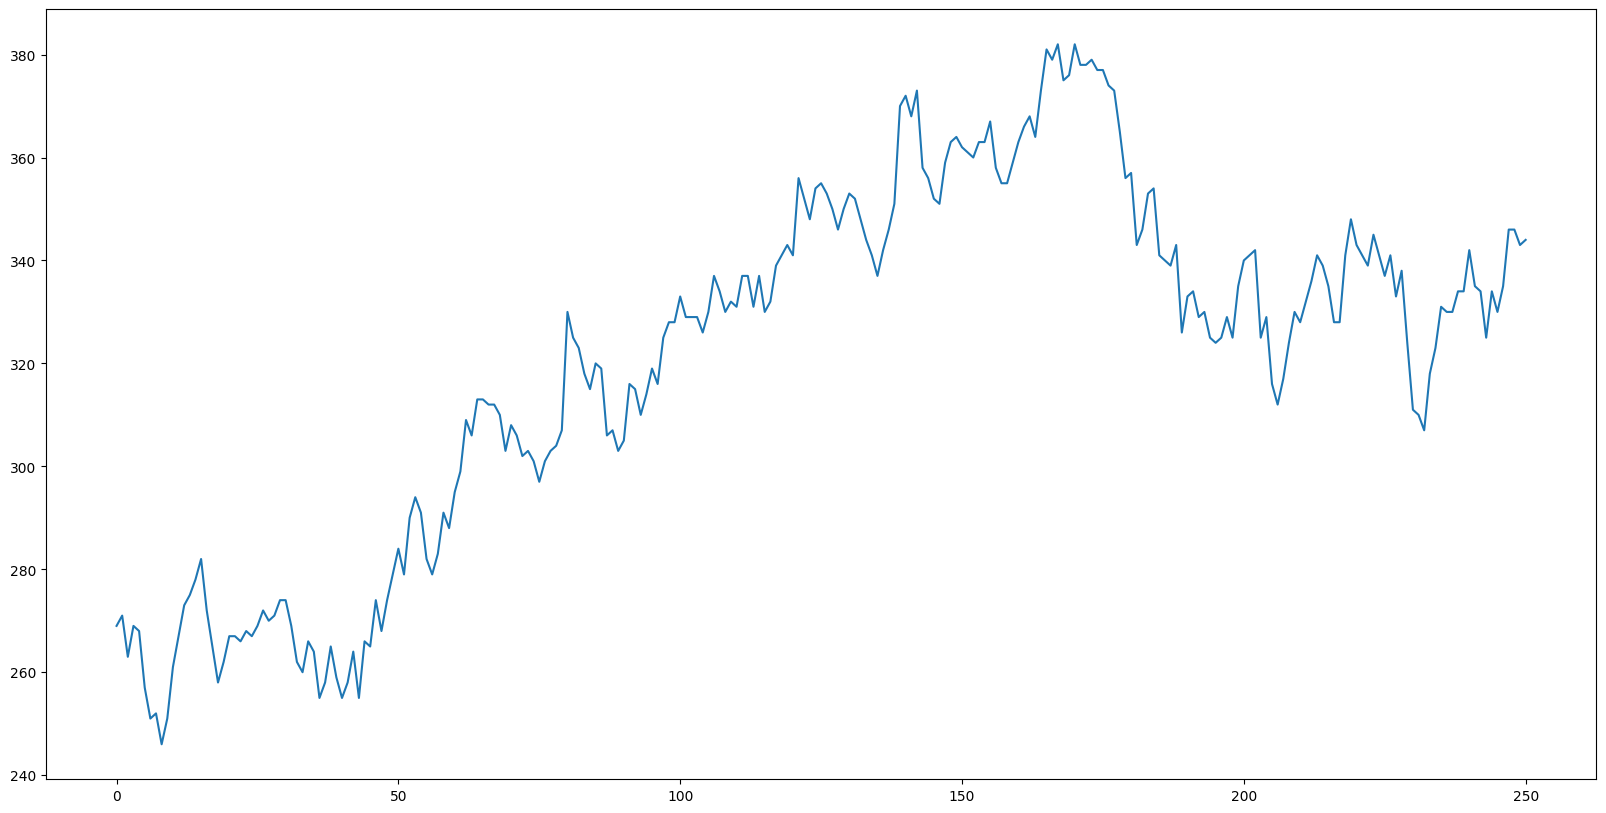

In [11]:
plt.figure(figsize=[20,10])
plt.plot(prices['Price'])
plt.show()

In [12]:
prices.count()

,0
Date,251
Price,251


Data pre processing

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_prices = scaler.fit_transform(prices[["Price"]].values)

In [14]:
print(scaled_prices)

[[-1.49673154]
 [-1.4393189 ]
 [-1.66896946]
 [-1.49673154]
 [-1.52543786]
 [-1.84120738]
 [-2.01344531]
 [-1.98473899]
 [-2.15697691]
 [-2.01344531]
 [-1.7263821 ]
 [-1.55414418]
 [-1.38190626]
 [-1.32449362]
 [-1.23837465]
 [-1.12354937]
 [-1.41061258]
 [-1.61155682]
 [-1.81250106]
 [-1.69767578]
 [-1.55414418]
 [-1.55414418]
 [-1.5828505 ]
 [-1.52543786]
 [-1.55414418]
 [-1.49673154]
 [-1.41061258]
 [-1.46802522]
 [-1.4393189 ]
 [-1.35319994]
 [-1.35319994]
 [-1.49673154]
 [-1.69767578]
 [-1.75508842]
 [-1.5828505 ]
 [-1.64026314]
 [-1.89862003]
 [-1.81250106]
 [-1.61155682]
 [-1.78379474]
 [-1.89862003]
 [-1.81250106]
 [-1.64026314]
 [-1.89862003]
 [-1.5828505 ]
 [-1.61155682]
 [-1.35319994]
 [-1.52543786]
 [-1.35319994]
 [-1.20966833]
 [-1.06613673]
 [-1.20966833]
 [-0.89389881]
 [-0.77907353]
 [-0.86519249]
 [-1.12354937]
 [-1.20966833]
 [-1.09484305]
 [-0.86519249]
 [-0.95131145]
 [-0.75036721]
 [-0.63554192]
 [-0.34847872]
 [-0.43459768]
 [-0.23365344]
 [-0.23365344]
 [-0.26235

In [15]:
total_size = len(scaled_prices)
test_size = 50
train_size = total_size-test_size

In [16]:
print(total_size)
print(test_size)
print(train_size)

251
50
201


In [17]:
training_prices=scaled_prices[:train_size]
test_prices = scaled_prices[train_size:]


In [18]:
print(training_prices.shape)

(201, 1)


In [19]:
print(test_prices.shape)

(50, 1)


In [20]:
def create_rnn_dataset(data , lookback=1):
    data_x=[]
    data_y =[]
    for i in range(len(data)-lookback-1):
        a=data[i:(i+lookback),0]
        data_x.append(a)
        data_y.append(data[i+lookback,0])
    return numpy.array(data_x), numpy.array(data_y)



In [21]:
lookback =25
train_req_x,train_req_y = create_rnn_dataset(training_prices,lookback)


In [22]:
train_req_x.shape

(175, 25)

In [23]:
train_req_y.shape

(175,)

In [24]:
train_req_x = numpy.reshape(train_req_x,(train_req_x.shape[0],1,train_req_x.shape[1]))

In [41]:
print(train_req_x.shape)

(175, 1, 25)


In [25]:
!pip install tensorflow
!pip install keras

In [26]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
import tensorflow as tf

In [27]:
price_model= Sequential()
price_model.add(SimpleRNN(4,input_shape=(1,lookback)))
price_model.add(Dense(1))

price_model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
price_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 4)                   │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 125 (500.00 B)

 Trainable params: 125 (500.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
x_test, y_test = create_rnn_dataset(test_prices, lookback)
x_test = numpy.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [30]:
price_model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - loss: 0.6019


0.6018536686897278

In [31]:
price_model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


array([[-0.5072679 ],
       [-0.6473285 ],
       [-0.49147224],
       [-0.19373685],
       [ 0.37345544],
       [ 0.28024435],
       [ 0.11784312],
       [ 0.40075663],
       [ 0.95630133],
       [ 0.7792249 ],
       [ 0.54827297],
       [ 0.44659504],
       [ 0.51246   ],
       [ 0.45028743],
       [ 0.21824053],
       [-0.3301574 ],
       [-0.57141   ],
       [-1.2697079 ],
       [-1.0042864 ],
       [-0.7673301 ],
       [-0.33824873],
       [ 0.03986643],
       [-0.4071068 ],
       [ 0.30520755]], dtype=float32)

In [32]:
scaler.inverse_transform(price_model.predict(x_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[303.4685 ],
       [298.58942],
       [304.01874],
       [314.3905 ],
       [334.14896],
       [330.90192],
       [325.24457],
       [335.1    ],
       [354.4527 ],
       [348.28415],
       [340.23883],
       [336.6968 ],
       [338.99127],
       [336.82544],
       [328.74197],
       [309.63824],
       [301.23407],
       [276.90848],
       [286.1546 ],
       [294.4091 ],
       [309.35635],
       [322.5282 ],
       [306.95767],
       [331.7715 ]], dtype=float32)

Prediction


In [33]:
prev_prices= numpy.array([349, 348, 342, 345, 369,
                          367, 308, 395, 318, 326,
                          393, 354, 301, 399, 343,
                          391, 372, 320, 397, 300,
                          347, 344, 375, 367, 337])
scaled_prices =scaler.transform(prev_prices.reshape(-1,1))
model_input=numpy.reshape(scaled_prices,(scaled_prices.shape[1],1,scaled_prices.shape[0]))
pred =price_model.predict(model_input)
stock_pred=scaler.inverse_transform(pred)
print(stock_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
[[301.9215]]
